# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip3 install bs4
!pip3 install requests
!pip3 install wordcloud

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import sys
from wordcloud import WordCloud
import matplotlib.pyplot as plt


## **Scrapping Movies Data**

In [3]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Write Your Code here
# Taking the url from the website
movie_url = soup.find_all('a', href=True)

# Removing unnecessary elements from the movie_url
l = [link['href'] for link in movie_url if '/movie/' in link['href']]

# making list of all the links
links = []  # An empty array for storing links
for x in l:

  # appending all the link in links
  links.append("https://www.justwatch.com"+x)

# Check output
# len(links)
links

['https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/project-k',
 'https://www.justwatch.com/in/movie/kill-2024',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/stree',
 'https://www.justwatch.com/in/movie/siddharth-roy',
 'https://www.justwatch.com/in/movie/tumbbad',
 'https://www.justwatch.com/in/movie/raayan',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/maharaja-2024',
 'https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project',
 'https://www.justwatch.com/in/movie/laila-majnu',
 'https://www.justwatch.com/in/movie/double-ismart',
 'https://www.justwatch.com/in/movie/bhediya',
 'https://www.justwatch.com/in/movie/the-fall-guy',
 'https://www.justwatch.com/in/movie/salaar',
 'https://www.justwatch.com/in/movie/chandu-champion',
 'https://www.justwatch.com/in/movie/inside-out-2',
 'https://www.justwatch.com/in/movie/365-days',
 'https://www.justwatch.com/i

## **Scrapping Movie Title**

In [5]:
# Write Your Code here

# Creating an empty array for storing movie names
movie_title = []
for t in l:

  # removing and appending unnecessary elements
  movie_title.append(t.replace("/in/movie/", "").replace("-"," "))

# len(movie_title)
movie_title

['stree 2',
 'project k',
 'kill 2024',
 'munjha',
 'stree',
 'siddharth roy',
 'tumbbad',
 'raayan',
 'deadpool 3',
 'maharaja 2024',
 'untitled vicky kaushal prime video project',
 'laila majnu',
 'double ismart',
 'bhediya',
 'the fall guy',
 'salaar',
 'chandu champion',
 'inside out 2',
 '365 days',
 'je jatt vigad gya',
 'sector 36',
 'godzilla x kong the new empire',
 'trisha on the rocks',
 'bad boys 4',
 'twisters',
 'thangalaan',
 'longlegs',
 'dune part two',
 'aavesham 2024',
 'rebel ridge',
 'aadujeevitham',
 'phir aayi hasseen dillruba',
 'la bete',
 'despicable me 4 2024',
 'aattam',
 'vedaa',
 'nunakuzhi',
 'furiosa',
 'land of bad',
 'kingdom of the planet of the apes',
 'thalapathy 68',
 'alien covenant',
 'indian 2',
 'golam',
 'alien romulus',
 'geostorm',
 'maharshi',
 'american psycho',
 'mr bachchan',
 'it ends with us',
 'a quiet place day one',
 'thalavan',
 'hanu man',
 'sam bahadur',
 'oppenheimer',
 'the gangster the cop the devil',
 'the intern',
 'mangalav

## **Scrapping release Year**

In inside of each movie link, the year is mention like this


```
<span class="release-year" data-v-fe9b18ea="">
  (2024)
</span>
```

so I will iterate through each link and find this specific span using soup.find_all.



In [6]:
## Scraping movie release year
def fetch_movie_years(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

release_year = []

for y in links:
    url = y
    soup = fetch_movie_years(url)
    
    if soup:
        print(f"Processing URL: {url}")  # Print to see if correct pages are being fetched
        # Look for the correct tag or class for the release year
        year_tag = soup.find('span', class_=re.compile(r'release-year'))
        
        if year_tag:
            # Clean the year text
            year = year_tag.text.strip("()")
            print(f"Found year: {year}")  # Debugging print
            release_year.append(year)
        else:
            print(f"No release year found for {url}")
            release_year.append(np.nan)
    else:
        release_year.append(np.nan)

# Check the length of the release_year list
# print(len(release_year))


Processing URL: https://www.justwatch.com/in/movie/stree-2
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/project-k
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/kill-2024
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/munjha
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/stree
Found year: 2018
Processing URL: https://www.justwatch.com/in/movie/siddharth-roy
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/tumbbad
Found year: 2018
Processing URL: https://www.justwatch.com/in/movie/raayan
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/deadpool-3
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/maharaja-2024
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project
Found year: 2024
Processing URL: https://www.justwatch.com/in/movie/laila-majnu
Found year: 2018
Processing URL: https://www.justwa

In [7]:
release_year

['2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2022',
 '2024',
 '2023',
 '2024',
 '2024',
 '2020',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2017',
 '2024',
 '2024',
 '2024',
 '2017',
 '2019',
 '2000',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2023',
 '2019',
 '2015',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2016',
 '2001',
 '2015',
 '2024',
 '2023',
 '2023',
 '2024',
 '2024',
 '2023',
 '2024',
 '2016',
 '2011',
 '2019',
 '2001',
 '2024',
 '2024',
 '2024',
 '2024',
 '2021',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2021',
 '2013',
 '2023',
 '2006',
 '2024',
 '2003',
 '2015',
 '2019',
 '2016',
 '2024',
 '2001',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024']

## **Scrapping Genres**

In inside of each movie link, the Genres is mention like this


```
<div class="detail-infos">
<h3 class="detail-infos__subheading">Genres</h3>
<div class="detail-infos__value">
<span>
Mystery &amp; Thriller, Science-Fiction, Action &amp; Adventure, Drama, Fantasy
</span>
<!----><
/div>
</div>
```

so I will iterate through each link and find this specific span using soup.find_all.



In [8]:
# Write Your Code here
## Scraping movie production country
def fetch_movie_genra(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

movie_genra_list = []

for y in links:
    print
    url = y
    soup = fetch_movie_genra(url)
    
    if soup:
        # Find the section that contains 'Production country'
        movie_genra_section = soup.find('h3', text=re.compile(r'Genres'))
        
        if movie_genra_section:
            # Get the next div containing the production country
            genre = movie_genra_section.find_next('div', class_='detail-infos__value').text.strip()
            print(genre)  # Debugging print
            movie_genra_list.append(genre)
        else:
            print(f"No production country found for {url}")
            movie_genra_list.append(np.nan)
    else:
        movie_genra_list.append(np.nan)

# Check the length of the production_country_list and print some results
print(len(movie_genra_list))
print(movie_genra_list[:5])  # Print the first few results

/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_7578/1700956878.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  movie_genra_section = soup.find('h3', text=re.compile(r'Genres'))


Comedy, Horror
Action & Adventure, Fantasy, Science-Fiction, Drama, Mystery & Thriller
Action & Adventure, Crime, Drama, Mystery & Thriller
Comedy, Horror
Horror, Comedy, Drama
Drama, Romance
Fantasy, Horror, Mystery & Thriller, Drama, Made in Europe
Action & Adventure, Drama, Mystery & Thriller
Science-Fiction, Action & Adventure, Comedy
Mystery & Thriller, Action & Adventure, Crime, Drama
Romance, Comedy, Drama
Romance, Drama
Action & Adventure, Science-Fiction, Mystery & Thriller
Comedy, Horror, Mystery & Thriller
Action & Adventure, Comedy, Drama, Romance
Crime, Drama, Mystery & Thriller, Action & Adventure
Drama, History, Sport, War & Military, Action & Adventure
Fantasy, Animation, Kids & Family, Action & Adventure, Comedy, Drama
Drama, Romance, Made in Europe
Drama
Crime, Mystery & Thriller, Drama
Science-Fiction, Fantasy, Mystery & Thriller, Action & Adventure
Romance, Comedy
Crime, Mystery & Thriller, Comedy, Action & Adventure
Mystery & Thriller, Action & Adventure
History, A

In [9]:
movie_genra_list

['Comedy, Horror',
 'Action & Adventure, Fantasy, Science-Fiction, Drama, Mystery & Thriller',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Comedy, Horror',
 'Horror, Comedy, Drama',
 'Drama, Romance',
 'Fantasy, Horror, Mystery & Thriller, Drama, Made in Europe',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Science-Fiction, Action & Adventure, Comedy',
 'Mystery & Thriller, Action & Adventure, Crime, Drama',
 'Romance, Comedy, Drama',
 'Romance, Drama',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Comedy, Horror, Mystery & Thriller',
 'Action & Adventure, Comedy, Drama, Romance',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Drama, History, Sport, War & Military, Action & Adventure',
 'Fantasy, Animation, Kids & Family, Action & Adventure, Comedy, Drama',
 'Drama, Romance, Made in Europe',
 'Drama',
 'Crime, Mystery & Thriller, Drama',
 'Science-Fiction, Fantasy, Mystery & Thriller, Action & Adventure',
 'Romance, Comedy',
 'Crime, My

## **Scrapping IMBD Rating**



```
<div class="title-detail-hero-details__item" data-v-57ee618e="">
  <img src="appassets/img/imdb-logo.png" alt="ImDB Logo" img="imdb-logo" data-v-57ee618e="">
    <span class="imdb-score" data-v-57ee618e="">
    7.7 (19k)
  </span>
</div>
```



In [10]:
def fetch_movie_imdb_score(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code) # Print error message and return None
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup # Return BeautifulSoup object if successful

imdb_score = []
for url in links:  # Assuming 'links' is a list of URLs
    print(url)
    soup = fetch_movie_imdb_score(url)

    # If request failed (soup is None), append np.nan and skip
    if soup is None:
        imdb_score.append(np.nan)
        continue

    detail_div = soup.find('div', class_="title-detail-hero-details")

    # Find the span with the class "imdb-score" within the detail div
    if detail_div:
        imdb_span = detail_div.find('span', class_="imdb-score")
        if imdb_span:
            imdb = imdb_span.text.strip()  # Extract and clean the score
            print(imdb)
            imdb_score.append(imdb)
        else:
            print("IMDB score not found within the detail div.")
            imdb_score.append(np.nan)
    else:
        print("Detail div not found.")
        imdb_score.append(np.nan)


https://www.justwatch.com/in/movie/stree-2
7.7 (23k)
https://www.justwatch.com/in/movie/project-k
7.1 (54k)
https://www.justwatch.com/in/movie/kill-2024
7.6 (26k)
https://www.justwatch.com/in/movie/munjha
6.5 (20k)
https://www.justwatch.com/in/movie/stree
7.5 (41k)
https://www.justwatch.com/in/movie/siddharth-roy
7.3 (2.4k)
https://www.justwatch.com/in/movie/tumbbad
8.2 (62k)
https://www.justwatch.com/in/movie/raayan
6.5 (7.8k)
https://www.justwatch.com/in/movie/deadpool-3
8.0 (280k)
https://www.justwatch.com/in/movie/maharaja-2024
8.5 (45k)
https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project
5.3 (24k)
https://www.justwatch.com/in/movie/laila-majnu
7.7 (6.4k)
https://www.justwatch.com/in/movie/double-ismart
3.0 (1.4k)
https://www.justwatch.com/in/movie/bhediya
6.7 (26k)
https://www.justwatch.com/in/movie/the-fall-guy
6.9 (129k)
https://www.justwatch.com/in/movie/salaar
6.6 (69k)
https://www.justwatch.com/in/movie/chandu-champion
7.9 (30k)
https://www.justwatch

In [11]:
def fetch_movie_imdb_score(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code) # Print error message and return None
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup # Return BeautifulSoup object if successful

imdb_score = []
for i in links:
    url = i
    print(url)
    soup = fetch_movie_imdb_score(url)

    detail_div = soup.find('div', "title-detail-hero-details")

    # Find the span with the class "imdb-score" within the detail div
    if detail_div:
        imdb_span = detail_div.find('span', "imdb-score")
        if imdb_span:
            imdb = imdb_span.text.strip() # Extract and clean the score
            print(imdb)
            imdb_score.append(imdb)
        else:
            print("IMDB score not found within the detail div.")
            imdb_score.append(np.nan)
    else:
        print("Detail div not found.")
        imdb_score.append(np.nan)


https://www.justwatch.com/in/movie/stree-2
7.7 (23k)
https://www.justwatch.com/in/movie/project-k
7.1 (54k)
https://www.justwatch.com/in/movie/kill-2024
7.6 (26k)
https://www.justwatch.com/in/movie/munjha
6.5 (20k)
https://www.justwatch.com/in/movie/stree
7.5 (41k)
https://www.justwatch.com/in/movie/siddharth-roy
7.3 (2.4k)
https://www.justwatch.com/in/movie/tumbbad
8.2 (62k)
https://www.justwatch.com/in/movie/raayan
6.5 (7.8k)
https://www.justwatch.com/in/movie/deadpool-3
8.0 (280k)
https://www.justwatch.com/in/movie/maharaja-2024
8.5 (45k)
https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project
5.3 (24k)
https://www.justwatch.com/in/movie/laila-majnu
7.7 (6.4k)
https://www.justwatch.com/in/movie/double-ismart
3.0 (1.4k)
https://www.justwatch.com/in/movie/bhediya
6.7 (26k)
https://www.justwatch.com/in/movie/the-fall-guy
6.9 (129k)
https://www.justwatch.com/in/movie/salaar
6.6 (69k)
https://www.justwatch.com/in/movie/chandu-champion
7.9 (30k)
https://www.justwatch

In [12]:
imdb_score

['7.7 (23k)',
 '7.1 (54k)',
 '7.6 (26k)',
 '6.5 (20k)',
 '7.5 (41k)',
 '7.3 (2.4k)',
 '8.2 (62k)',
 '6.5 (7.8k)',
 '8.0 (280k)',
 '8.5 (45k)',
 '5.3 (24k)',
 '7.7 (6.4k)',
 '3.0 (1.4k)',
 '6.7 (26k)',
 '6.9 (129k)',
 '6.6 (69k)',
 '7.9 (30k)',
 '7.7 (129k)',
 '3.3 (100k)',
 '4.7 (601)',
 '7.5 (11k)',
 '6.1 (102k)',
 '5.4 (2.6k)',
 '6.6 (67k)',
 '6.6 (98k)',
 '7.3 (3.7k)',
 '6.8 (99k)',
 '8.5 (515k)',
 '7.8 (20k)',
 '7.0 (32k)',
 '7.1 (42k)',
 '5.8 (5.5k)',
 '6.6 (5.7k)',
 '6.2 (41k)',
 '8.2 (3.3k)',
 '6.7 (1.4k)',
 '7.0 (1.8k)',
 '7.5 (195k)',
 '6.6 (40k)',
 '6.9 (121k)',
 '6.8 (12k)',
 '6.4 (317k)',
 '4.0 (15k)',
 '7.2 (2.9k)',
 '7.4 (99k)',
 '5.3 (121k)',
 '7.2 (10k)',
 '7.6 (739k)',
 '4.0 (4.7k)',
 '6.7',
 '6.3 (96k)',
 '7.2 (1.7k)',
 '7.8 (27k)',
 '7.7 (18k)',
 '8.3 (795k)',
 '6.9 (25k)',
 '7.1 (281k)',
 '6.7 (2.9k)',
 '5.4 (35k)',
 '7.0 (19k)',
 '7.9 (2.8k)',
 '6.6 (12k)',
 '8.4 (41k)',
 '8.0 (1m)',
 '7.6 (870k)',
 '7.0 (3k)',
 '6.8 (311)',
 '4.2 (1.5k)',
 '6.1 (98k)',
 '8.3 (22k)

## **Scrapping Runtime/Duration**

```
<div class="title-info title-info">
<!---->
    <div class="detail-infos">
        <h3 class="detail-infos__subheading">Genres</h3>
        <div class="detail-infos__value">
        <span>Comedy, Horror</span>
        <!---->
    </div>
</div>

<div class="detail-infos">
    <h3 class="detail-infos__subheading">Runtime</h3>
    <div class="detail-infos__value">2h 27min</div>
</div>

<div class="detail-infos">
    <h3 class="detail-infos__subheading">Age rating</h3>
    <div class="detail-infos__value">UA</div>
</div>

<div class="detail-infos">
    <h3 class="detail-infos__subheading" style="max-width: fit-content;"> Production country </h3>
    <div class="detail-infos__value">India</div></div>
    <!---->
</div>
```

In [13]:
## Scraping movie runtime
def fetch_movie_runtime(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

runtime_list = []

for y in links:
    url = y
    soup = fetch_movie_runtime(url)
    
    if soup:
        # Find the section that contains 'Runtime'
        runtime_section = soup.find('h3', text=re.compile(r'Runtime'))
        
        if runtime_section:
            # Get the next div containing the runtime
            runtime = runtime_section.find_next('div', class_='detail-infos__value').text.strip()
            print(f"Found runtime: {runtime}")  # Debugging print
            runtime_list.append(runtime)
        else:
            print(f"No runtime found for {url}")
            runtime_list.append(np.nan)
    else:
        runtime_list.append(np.nan)

# Check the length of the runtime list and print some results
print(len(runtime_list))
print(runtime_list[:5])  # Print the first few results


/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_7578/1912464386.py:21: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  runtime_section = soup.find('h3', text=re.compile(r'Runtime'))


Found runtime: 2h 27min
Found runtime: 2h 56min
Found runtime: 1h 45min
Found runtime: 2h 3min
Found runtime: 2h 7min
Found runtime: 2h 28min
Found runtime: 1h 53min
Found runtime: 2h 25min
Found runtime: 2h 8min
Found runtime: 2h 21min
Found runtime: 2h 20min
Found runtime: 2h 19min
Found runtime: 2h 36min
Found runtime: 2h 36min
Found runtime: 2h 6min
Found runtime: 2h 55min
Found runtime: 2h 22min
Found runtime: 1h 37min
Found runtime: 1h 54min
Found runtime: 2h 12min
Found runtime: 2h 3min
Found runtime: 1h 55min
Found runtime: 2h 52min
Found runtime: 1h 55min
Found runtime: 2h 3min
Found runtime: 2h 36min
Found runtime: 1h 41min
Found runtime: 2h 47min
Found runtime: 2h 38min
Found runtime: 2h 12min
Found runtime: 2h 0min
Found runtime: 2h 13min
Found runtime: 2h 26min
Found runtime: 1h 34min
Found runtime: 2h 19min
Found runtime: 2h 30min
Found runtime: 2h 5min
Found runtime: 2h 28min
Found runtime: 1h 53min
Found runtime: 2h 25min
Found runtime: 3h 3min
Found runtime: 2h 2min
Fo

In [14]:
runtime_list

['2h 27min',
 '2h 56min',
 '1h 45min',
 '2h 3min',
 '2h 7min',
 '2h 28min',
 '1h 53min',
 '2h 25min',
 '2h 8min',
 '2h 21min',
 '2h 20min',
 '2h 19min',
 '2h 36min',
 '2h 36min',
 '2h 6min',
 '2h 55min',
 '2h 22min',
 '1h 37min',
 '1h 54min',
 '2h 12min',
 '2h 3min',
 '1h 55min',
 '2h 52min',
 '1h 55min',
 '2h 3min',
 '2h 36min',
 '1h 41min',
 '2h 47min',
 '2h 38min',
 '2h 12min',
 '2h 0min',
 '2h 13min',
 '2h 26min',
 '1h 34min',
 '2h 19min',
 '2h 30min',
 '2h 5min',
 '2h 28min',
 '1h 53min',
 '2h 25min',
 '3h 3min',
 '2h 2min',
 '3h 0min',
 '2h 0min',
 '1h 59min',
 '1h 49min',
 '2h 56min',
 '1h 42min',
 '2h 40min',
 '2h 11min',
 '1h 39min',
 '2h 13min',
 '2h 39min',
 '2h 30min',
 '3h 0min',
 '1h 50min',
 '2h 1min',
 '2h 29min',
 '1h 49min',
 '2h 15min',
 '2h 34min',
 '2h 12min',
 '2h 2min',
 '1h 48min',
 '2h 32min',
 '1h 56min',
 '2h 22min',
 '2h 34min',
 '3h 21min',
 '2h 15min',
 '2h 3min',
 '2h 27min',
 '2h 15min',
 '2h 9min',
 '2h 39min',
 '2h 10min',
 '1h 44min',
 '2h 44min',
 '2

## **Scrapping Age Rating**

```
<div class="title-info title-info">
<!---->
    <div class="detail-infos">
        <h3 class="detail-infos__subheading">Genres</h3>
        <div class="detail-infos__value">
        <span>Comedy, Horror</span>
        <!---->
    </div>
</div>

<div class="detail-infos">
    <h3 class="detail-infos__subheading">Runtime</h3>
    <div class="detail-infos__value">2h 27min</div>
</div>

<div class="detail-infos">
    <h3 class="detail-infos__subheading">Age rating</h3>
    <div class="detail-infos__value">UA</div>
</div>

<div class="detail-infos">
    <h3 class="detail-infos__subheading" style="max-width: fit-content;"> Production country </h3>
    <div class="detail-infos__value">India</div></div>
    <!---->
</div>
```

In [15]:
## Scraping movie age rating
def fetch_movie_age_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

age_rating_list = []

for y in links:
    url = y
    soup = fetch_movie_age_rating(url)
    
    if soup:
        # Find the section that contains 'Age rating'
        age_rating_section = soup.find('h3', text=re.compile(r'Age rating'))
        
        if age_rating_section:
            # Get the next div containing the age rating
            age_rating = age_rating_section.find_next('div', class_='detail-infos__value').text.strip()
            print(f"Found age rating: {age_rating}")  # Debugging print
            age_rating_list.append(age_rating)
        else:
            print(f"No age rating found for {url}")
            age_rating_list.append(np.nan)
    else:
        age_rating_list.append(np.nan)

# Check the length of the age_rating_list and print some results
print(len(age_rating_list))
print(age_rating_list[:5])  # Print the first few results


Found age rating: UA


/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_7578/97997189.py:21: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  age_rating_section = soup.find('h3', text=re.compile(r'Age rating'))


Found age rating: UA
Found age rating: A
Found age rating: UA
Found age rating: UA
Found age rating: A
Found age rating: A
Found age rating: A
Found age rating: A
No age rating found for https://www.justwatch.com/in/movie/maharaja-2024
No age rating found for https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project
Found age rating: UA
Found age rating: UA
Found age rating: UA
Found age rating: UA
Found age rating: A
Found age rating: UA
Found age rating: U
No age rating found for https://www.justwatch.com/in/movie/365-days
No age rating found for https://www.justwatch.com/in/movie/je-jatt-vigad-gya
Found age rating: A
Found age rating: UA
Found age rating: UA
Found age rating: A
Found age rating: UA
Found age rating: UA
Found age rating: A
Found age rating: UA
No age rating found for https://www.justwatch.com/in/movie/aavesham-2024
No age rating found for https://www.justwatch.com/in/movie/rebel-ridge
Found age rating: UA
No age rating found for https://www.justwa

In [16]:
age_rating_list

['UA',
 'UA',
 'A',
 'UA',
 'UA',
 'A',
 'A',
 'A',
 'A',
 nan,
 nan,
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'UA',
 'U',
 nan,
 nan,
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 nan,
 nan,
 'UA',
 nan,
 nan,
 nan,
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 nan,
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 nan,
 'UA',
 'A',
 'UA',
 'A',
 nan,
 nan,
 'UA',
 'UA',
 'UA',
 nan,
 nan,
 nan,
 nan,
 'UA',
 'A',
 nan,
 'UA',
 'A',
 'U',
 'UA',
 nan,
 'UA',
 'A',
 'UA',
 'U',
 nan,
 nan,
 'A',
 'UA',
 nan,
 nan,
 'A',
 nan,
 'A',
 'UA',
 'UA',
 nan,
 nan,
 'UA',
 nan,
 'A',
 'UA',
 'A',
 nan,
 'A',
 'U',
 'A',
 'U',
 'UA',
 'UA',
 'U',
 'U',
 nan,
 'U',
 'UA',
 'UA',
 'A',
 'UA',
 'UA',
 nan,
 nan,
 nan,
 nan,
 nan]

## **Fetching Production Countries Details**

In [17]:
# Write Your Code here
## Scraping movie production country
def fetch_movie_production_country(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

production_country_list = []

for y in links:
    print
    url = y
    soup = fetch_movie_production_country(url)
    
    if soup:
        # Find the section that contains 'Production country'
        production_country_section = soup.find('h3', text=re.compile(r'Production country'))
        
        if production_country_section:
            # Get the next div containing the production country
            production_country = production_country_section.find_next('div', class_='detail-infos__value').text.strip()
            print(f"Found production country: {production_country}")  # Debugging print
            production_country_list.append(production_country)
        else:
            print(f"No production country found for {url}")
            production_country_list.append(np.nan)
    else:
        production_country_list.append(np.nan)

# Check the length of the production_country_list and print some results
print(len(production_country_list))
print(production_country_list[:5])  # Print the first few results


/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_7578/1376634721.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  production_country_section = soup.find('h3', text=re.compile(r'Production country'))


Found production country: India
Found production country: India
Found production country: India
Found production country: India
Found production country: India
Found production country: India
Found production country: Sweden, India
Found production country: India
Found production country: United States
Found production country: India
Found production country: India
Found production country: India
Found production country: India
Found production country: India
Found production country: Canada, United States, Australia
Found production country: India
Found production country: India
Found production country: United States
Found production country: Poland
Found production country: India
Found production country: India
Found production country: United States
Found production country: India
Found production country: United States
Found production country: United States
Found production country: India
Found production country: Canada, United States
Found production country: United States
Foun

In [18]:
production_country_list

['India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Sweden, India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Canada, United States, Australia',
 'India',
 'India',
 'United States',
 'Poland',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'India',
 'Canada, United States',
 'United States',
 'India',
 'United States',
 'United States, India',
 'India',
 'France, Canada',
 'United States',
 'India',
 'India',
 'India',
 'United States, Australia',
 'Australia, Czech Republic, United States',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'Canada, Hong Kong, United States',
 'India',
 'United States, Canada',
 'India',
 'United States',
 'United States, United Kingdom, Canada',
 'India',
 'India',
 'India',
 'United Kingdom, United States',
 'South Korea',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'Uni

## **Fetching Streaming Service Details**

In [19]:
# Write Your Code here


## **Now Creating Movies DataFrame**

In [20]:
# Write Your Code here
movies_df = pd.DataFrame({
    "Title":movie_title,
    "Genra":movie_genra_list,
    "Release_year":release_year,
    "Run_time":runtime_list,
    "IMDB_rating":imdb_score,
    "Age_rating":age_rating_list,
    "Production_country":production_country_list,
    "Link":links
})

movies_df.to_csv("JustWatch_Movies_List.csv", index=False)

## **Scraping TV  Show Data**

In [21]:
def fetch_TV_series_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup=fetch_TV_series_urls(url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

soup

In [22]:
tv_show = soup.find_all('a', href=True)

tv = [link['href'] for link in tv_show if 'tv-show' in link['href']]

tv_links = []

for link in tv:
    tv_links.append("https://www.justwatch.com"+link)
    
tv_links = tv_links[76:176] # Indexing top 100 movies.

In [23]:
tv_links

['https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/adams-sweet-agony',
 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah',
 'https://www.justwatch.com/in/tv-show/ic-814',
 'https://www.justwatch.com/in/tv-show/shekhar-home',
 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored',
 'https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power',
 'https://www.justwatch.com/in/tv-show/call-me-bae',
 'https://www.justwatch.com/in/tv-show/house-of-the-dragon',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/terminator-zero',
 'https://www.justwatch.com/in/tv-show/the-boys',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/from',
 'https://www.justwatch.com/in/tv-show/the-frog-2024',
 'https://www.justwatch.com/in/tv-show/only-murders-in-the-building',
 'https://www.justwatch.com/in/tv-show/

## **Fetching Tv Show Title details**

In [24]:
tv_titles = []
for i in tv_links:
    tv_titles.append(i.replace("https://www.justwatch.com/in/tv-show/", "").replace("-", " "))
    
tv_titles

['mirzapur',
 'adams sweet agony',
 'gyaarah gyaarah',
 'ic 814',
 'shekhar home',
 'x x x uncensored',
 'the lord of the rings the rings of power',
 'call me bae',
 'house of the dragon',
 'game of thrones',
 'terminator zero',
 'the boys',
 'shogun 2024',
 'panchayat',
 'from',
 'the frog 2024',
 'only murders in the building',
 'attack on titan',
 'bigg boss',
 'kaos',
 'apharan',
 'breaking bad',
 'terror tuesday extreme',
 'the perfect couple',
 'mastram',
 'farzi',
 'tribhuvan mishra ca topper',
 'tell me lies',
 'moms friends son',
 'demon slayer kimetsu no yaiba',
 'the old man',
 'the rookie',
 'the family man',
 'the umbrella academy',
 'asur',
 'emily in paris',
 'sweet home',
 'aashram',
 'taaza khabar',
 'gandii baat',
 'dark',
 'pachinko',
 'hidden love',
 'peaky blinders',
 'naruto shippuden',
 'paperhouse',
 'sherlock',
 'evil',
 'the bear',
 'life hill gayi',
 '2 broke girls',
 'auto shankar',
 'jeet ki zid',
 'sunflower 2021',
 'into the fire the lost daughter',
 '3 b

## **Fetching Release Year**

In [25]:
# Write Your Code here

## Scraping movie release year
def fetch_tv_series_years(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

tv_release_year = []

for y in tv_links:
    url = y
    soup = fetch_tv_series_years(url)
    
    if soup:
        print(f"Processing URL: {url}")  # Print to see if correct pages are being fetched
        # Look for the correct tag or class for the release year
        year_tag = soup.find('span', class_=re.compile(r'release-year'))
        
        if year_tag:
            # Clean the year text
            year = year_tag.text.strip("()")
            print(f"Found year: {year}")  # Debugging print
            tv_release_year.append(year)
        else:
            print(f"No release year found for {url}")
            tv_release_year.append(np.nan)
    else:
        tv_release_year.append(np.nan)

# Check the length of the release_year list
print(len(release_year))
print(tv_release_year[:6])

Processing URL: https://www.justwatch.com/in/tv-show/mirzapur
Found year: 2018
Processing URL: https://www.justwatch.com/in/tv-show/adams-sweet-agony
Found year: 2024
Processing URL: https://www.justwatch.com/in/tv-show/gyaarah-gyaarah
Found year: 2024
Processing URL: https://www.justwatch.com/in/tv-show/ic-814
Found year: 2024
Processing URL: https://www.justwatch.com/in/tv-show/shekhar-home
Found year: 2024
Processing URL: https://www.justwatch.com/in/tv-show/x-x-x-uncensored
Found year: 2018
Processing URL: https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power
Found year: 2022
Processing URL: https://www.justwatch.com/in/tv-show/call-me-bae
Found year: 2024
Processing URL: https://www.justwatch.com/in/tv-show/house-of-the-dragon
Found year: 2022
Processing URL: https://www.justwatch.com/in/tv-show/game-of-thrones
Found year: 2011
Processing URL: https://www.justwatch.com/in/tv-show/terminator-zero
Found year: 2024
Processing URL: https://www.justwatch.com/in/

In [26]:
tv_release_year

['2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2022',
 '2024',
 '2022',
 '2011',
 '2024',
 '2019',
 '2024',
 '2020',
 '2022',
 '2024',
 '2021',
 '2013',
 '2006',
 '2024',
 '2018',
 '2008',
 '2024',
 '2024',
 '2020',
 '2023',
 '2024',
 '2022',
 '2024',
 '2019',
 '2022',
 '2018',
 '2019',
 '2019',
 '2020',
 '2020',
 nan,
 '2020',
 nan,
 '2018',
 '2017',
 '2022',
 '2023',
 '2013',
 '2007',
 nan,
 nan,
 nan,
 nan,
 '2024',
 nan,
 '2019',
 '2021',
 nan,
 '2024',
 nan,
 nan,
 '2024',
 '2019',
 nan,
 '2009',
 nan,
 '2024',
 '2013',
 '2014',
 nan,
 nan,
 nan,
 nan,
 nan,
 '2020',
 '2009',
 nan,
 '2024',
 nan,
 nan,
 '2002',
 '2020',
 nan,
 nan,
 nan,
 '2024',
 '2020',
 nan,
 nan,
 '2005',
 nan,
 nan,
 '2018',
 nan,
 nan,
 '2005',
 '2005',
 nan,
 nan,
 '2002',
 nan,
 nan,
 nan,
 '2018']

## **Fetching TV Show Genre Details**

In [27]:
# Write Your Code here

# Write Your Code here
## Scraping movie production country
def fetch_tv_series_genra(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

tv_genra_list = []

for y in tv_links:
    print
    url = y
    soup = fetch_tv_series_genra(url)
    
    if soup:
        # Find the section that contains 'Production country'
        tv_genra_section = soup.find('h3', text=re.compile(r'Genres'))
        
        if tv_genra_section:
            # Get the next div containing the production country
            genre =  tv_genra_section.find_next('div', class_='detail-infos__value').text.strip()
            print(genre)  # Debugging print
            tv_genra_list.append(genre)
        else:
            print(f"No production country found for {url}")
            tv_genra_list.append(np.nan)
    else:
        tv_genra_list.append(np.nan)

# Check the length of the production_country_list and print some results
print(len(tv_genra_list))
print(tv_genra_list[:5])  # Print the first few results

/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_7578/4037109270.py:25: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tv_genra_section = soup.find('h3', text=re.compile(r'Genres'))


Action & Adventure, Drama, Mystery & Thriller, Crime
Animation
Fantasy, Drama, Science-Fiction
History, Mystery & Thriller, Drama, War & Military
Failed to retrieve the page, status code: 429
Failed to retrieve the page, status code: 429
Drama, Action & Adventure, Science-Fiction, Fantasy
Romance, Drama, Comedy
Action & Adventure, Science-Fiction, Drama, Fantasy, Romance
Drama, Action & Adventure, Science-Fiction, Fantasy
Science-Fiction, Animation, Action & Adventure
Science-Fiction, Action & Adventure, Crime, Drama, Comedy
Failed to retrieve the page, status code: 429
Failed to retrieve the page, status code: 429
Mystery & Thriller, Drama, Horror, Science-Fiction
Crime, Drama, Mystery & Thriller
Comedy, Crime, Drama, Mystery & Thriller
Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction
Kids & Family, Reality TV
Failed to retrieve the page, status code: 429
Action & Adventure, Crime, Mystery & Thriller, Drama
Drama, Crime, Mystery & Thriller
Failed to retrieve the 

In [28]:
tv_genra_list

['Action & Adventure, Drama, Mystery & Thriller, Crime',
 'Animation',
 'Fantasy, Drama, Science-Fiction',
 'History, Mystery & Thriller, Drama, War & Military',
 nan,
 nan,
 'Drama, Action & Adventure, Science-Fiction, Fantasy',
 'Romance, Drama, Comedy',
 'Action & Adventure, Science-Fiction, Drama, Fantasy, Romance',
 'Drama, Action & Adventure, Science-Fiction, Fantasy',
 'Science-Fiction, Animation, Action & Adventure',
 'Science-Fiction, Action & Adventure, Crime, Drama, Comedy',
 nan,
 nan,
 'Mystery & Thriller, Drama, Horror, Science-Fiction',
 'Crime, Drama, Mystery & Thriller',
 'Comedy, Crime, Drama, Mystery & Thriller',
 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction',
 'Kids & Family, Reality TV',
 nan,
 'Action & Adventure, Crime, Mystery & Thriller, Drama',
 'Drama, Crime, Mystery & Thriller',
 nan,
 'Mystery & Thriller, Crime, Drama',
 'Comedy, Drama, Fantasy',
 'Crime, Drama, Mystery & Thriller',
 'Mystery & Thriller, Comedy, Crime, Drama',
 'D

## **Fetching IMDB Rating Details**

In [29]:
def fetch_tv_series_imdb_score(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raises an HTTPError for bad responses
    except requests.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

tv_series_imdb_list = []

for url in tv_links:  # Assuming 'tv_links' is a list of URLs
    print(f"Processing URL: {url}")
    soup = fetch_tv_series_imdb_score(url)

    if soup is None:
        tv_series_imdb_list.append(np.nan)
        continue

    detail_div = soup.find('div', class_='title-detail-hero-details')

    if detail_div:
        tv_series_imdb_span = detail_div.find('span', class_='imdb-score')
        if tv_series_imdb_span:
            tv_series_imdb = tv_series_imdb_span.get_text(strip=True)
            print(tv_series_imdb)
            tv_series_imdb_list.append(tv_series_imdb)
        else:
            print(f"IMDB score not found for {url}.")
            tv_series_imdb_list.append(np.nan)
    else:
        print(f"Detail div not found for {url}.")
        tv_series_imdb_list.append(np.nan)

# Output the results
print(f"Collected IMDb scores: {len(tv_series_imdb_list)}")
print(tv_series_imdb_list)


Processing URL: https://www.justwatch.com/in/tv-show/mirzapur
8.4 (87k)
Processing URL: https://www.justwatch.com/in/tv-show/adams-sweet-agony
IMDB score not found for https://www.justwatch.com/in/tv-show/adams-sweet-agony.
Processing URL: https://www.justwatch.com/in/tv-show/gyaarah-gyaarah
8.2 (4.6k)
Processing URL: https://www.justwatch.com/in/tv-show/ic-814
5.5 (11k)
Processing URL: https://www.justwatch.com/in/tv-show/shekhar-home
8.2 (9.8k)
Processing URL: https://www.justwatch.com/in/tv-show/x-x-x-uncensored
4.8 (798)
Processing URL: https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power
Error fetching https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power
Processing URL: https://www.justwatch.com/in/tv-show/call-me-bae
6.2 (5.2k)
Processing URL: https://www.justwatch.com/in/tv-show/house-of-the-dragon
8.4 (444k

In [30]:
tv_series_imdb_list

['8.4 (87k)',
 nan,
 '8.2 (4.6k)',
 '5.5 (11k)',
 '8.2 (9.8k)',
 '4.8 (798)',
 nan,
 '6.2 (5.2k)',
 '8.4 (444k)',
 nan,
 '7.0 (6.7k)',
 '8.7 (721k)',
 nan,
 '9.0 (97k)',
 '7.7 (84k)',
 '6.9 (2.9k)',
 '8.1 (164k)',
 '9.1 (536k)',
 '3.6 (4.1k)',
 '7.5 (18k)',
 '8.2 (20k)',
 '9.5 (2m)',
 nan,
 '6.6 (21k)',
 nan,
 '8.4 (48k)',
 '7.0 (2.7k)',
 nan,
 '8.4 (1k)',
 '8.6 (165k)',
 '7.6 (50k)',
 '8.0 (82k)',
 '8.7 (101k)',
 '7.8 (292k)',
 '8.5 (67k)',
 '6.8',
 nan,
 '6.6 (58k)',
 '8.1 (49k)',
 '3.4 (3k)',
 '8.7 (460k)',
 nan,
 nan,
 '8.8 (672k)',
 nan,
 nan,
 nan,
 nan,
 nan,
 '6.5 (860)',
 '6.7 (106k)',
 '6.8 (289)',
 '8.3 (2.7k)',
 nan,
 '7.7 (1.3k)',
 nan,
 nan,
 nan,
 nan,
 nan,
 '8.5 (496k)',
 nan,
 nan,
 '9.0 (12k)',
 '8.9 (670k)',
 nan,
 nan,
 nan,
 nan,
 '8.1 (1m)',
 '6.4 (6.6k)',
 '7.7 (356k)',
 nan,
 nan,
 nan,
 '8.3 (610k)',
 '8.4 (134k)',
 nan,
 nan,
 '8.8 (6.1k)',
 nan,
 nan,
 '6.5 (9.6k)',
 nan,
 nan,
 '8.1 (223k)',
 nan,
 '7.7 (1.3k)',
 '7.7 (309k)',
 nan,
 nan,
 '8.3 (587k)',
 '8

## **Fetching Age Rating Details**

In [31]:
# Write Your Code here

def fetch_tv_series__age_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

tv_series_age_rating_list = []

for y in tv_links:
    url = y
    soup = fetch_tv_series__age_rating(url)
    
    if soup:
        # Find the section that contains 'Age rating'
        tv_series_age_rating_section = soup.find('h3', text=re.compile(r'Age rating'))
        
        if tv_series_age_rating_section:
            # Get the next div containing the age rating
            tv_series_age_rating = tv_series_age_rating_section.find_next('div', class_='detail-infos__value').text.strip()
            print(f"Found age rating: {tv_series_age_rating}")  # Debugging print
            tv_series_age_rating_list.append(tv_series_age_rating)
        else:
            print(f"No age rating found for {url}")
            tv_series_age_rating_list.append(np.nan)
    else:
        tv_series_age_rating_list.append(np.nan)

# Check the length of the age_rating_list and print some results
print(len(tv_series_age_rating_list))
print(tv_series_age_rating_list[:5])  # Print the first few results

Failed to retrieve the page, status code: 429
No age rating found for https://www.justwatch.com/in/tv-show/adams-sweet-agony


/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_7578/2202564809.py:22: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tv_series_age_rating_section = soup.find('h3', text=re.compile(r'Age rating'))


Found age rating: A
No age rating found for https://www.justwatch.com/in/tv-show/ic-814
No age rating found for https://www.justwatch.com/in/tv-show/shekhar-home
No age rating found for https://www.justwatch.com/in/tv-show/x-x-x-uncensored
No age rating found for https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power
No age rating found for https://www.justwatch.com/in/tv-show/call-me-bae
Found age rating: A
Found age rating: U
Failed to retrieve the page, status code: 429
Failed to retrieve the page, status code: 429
Failed to retrieve the page, status code: 429
No age rating found for https://www.justwatch.com/in/tv-show/panchayat
No age rating found for https://www.justwatch.com/in/tv-show/from
Found age rating: A
Failed to retrieve the page, status code: 429
Found age rating: UA
No age rating found for https://www.justwatch.com/in/tv-show/bigg-boss
Found age rating: A
No age rating found for https://www.justwatch.com/in/tv-show/apharan
Found age rating: A
Fai

In [32]:
tv_series_age_rating_list

[nan,
 nan,
 'A',
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 'U',
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 nan,
 'UA',
 nan,
 'A',
 nan,
 'A',
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 nan,
 'A',
 nan,
 'A',
 'U',
 nan,
 'U',
 nan,
 nan,
 nan,
 nan,
 'UA',
 'UA',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 'U',
 nan,
 nan,
 nan,
 nan,
 nan,
 'U',
 nan,
 nan,
 nan,
 'U',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 nan,
 nan,
 nan,
 'U',
 nan,
 nan,
 nan,
 'A',
 nan,
 nan,
 nan]

## **Fetching Production Country details**

In [33]:
# Write Your Code here


def fetch_tv_series_production_country(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

tv_series_production_country_list = []

for y in tv_links:
    print
    url = y
    soup = fetch_tv_series_production_country(url)
    
    if soup:
        # Find the section that contains 'Production country'
        tv_series_production_country_section = soup.find('h3', text=re.compile(r'Production country'))
        
        if tv_series_production_country_section:
            # Get the next div containing the production country
            tv_series_production_country = tv_series_production_country_section.find_next('div', class_='detail-infos__value').text.strip()
            print(f"Found production country: {tv_series_production_country}")  # Debugging print
            tv_series_production_country_list.append(tv_series_production_country)
        else:
            print(f"No production country found for {url}")
            tv_series_production_country_list.append(np.nan)
    else:
        tv_series_production_country_list.append(np.nan)

# Check the length of the production_country_list and print some results
print(len(tv_series_production_country_list))
print(tv_series_production_country_list[:5])

Found production country: India


/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_7578/2696460247.py:24: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tv_series_production_country_section = soup.find('h3', text=re.compile(r'Production country'))


Found production country: Japan
Found production country: India
Found production country: India
Found production country: India
Found production country: India
Found production country: United States
Found production country: India
Found production country: United States
Found production country: United States
Found production country: Japan, United States
Found production country: United States
Failed to retrieve the page, status code: 429
Found production country: India
Found production country: United States
Found production country: South Korea
Found production country: United States
Found production country: Japan
Found production country: India
Found production country: United Kingdom
Found production country: India
Found production country: United States
Found production country: Thailand
Found production country: United States
Found production country: India
Found production country: India
Found production country: India
Failed to retrieve the page, status code: 429
Failed to r

In [34]:
tv_series_production_country_list

['India',
 'Japan',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'Japan, United States',
 'United States',
 nan,
 'India',
 'United States',
 'South Korea',
 'United States',
 'Japan',
 'India',
 'United Kingdom',
 'India',
 'United States',
 'Thailand',
 'United States',
 'India',
 'India',
 'India',
 nan,
 nan,
 'Japan',
 'United States',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 'South Korea',
 'India',
 'India',
 'India',
 nan,
 'South Korea, Canada, United States',
 'China',
 'United Kingdom',
 nan,
 nan,
 'United Kingdom',
 nan,
 nan,
 'India',
 nan,
 'India',
 nan,
 nan,
 'United States',
 'United States',
 nan,
 'South Korea',
 'India',
 'United States',
 nan,
 nan,
 'India',
 'United States, India',
 nan,
 nan,
 nan,
 nan,
 'United States',
 'United States',
 'India',
 nan,
 'India',
 'United States',
 'India',
 'United States',
 nan,
 nan,
 'India',
 'Canada',
 nan,
 'United States',


## **Fetching Streaming Service details**

In [35]:
# Write Your Code here


## **Fetching Duration Details**

In [36]:
# Write Your Code here

def fetch_tv_series_runtime(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Failed to retrieve the page, status code:", response.status_code)
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

tv_series_runtime_list = []

for y in tv_links:
    url = y
    soup = fetch_tv_series_runtime(url)
    
    if soup:
        # Find the section that contains 'Runtime'
        tv_series_runtime_section = soup.find('h3', text=re.compile(r'Runtime'))
        
        if tv_series_runtime_section:
            # Get the next div containing the runtime
            tv_runtime = tv_series_runtime_section.find_next('div', class_='detail-infos__value').text.strip()
            print(f"Found runtime: {tv_runtime}")  # Debugging print
            tv_series_runtime_list.append(tv_runtime)
        else:
            print(f"No runtime found for {url}")
            tv_series_runtime_list.append(np.nan)
    else:
        tv_series_runtime_list.append(np.nan)

# Check the length of the runtime list and print some results
print(len(tv_series_runtime_list))
print(tv_series_runtime_list[:5])

/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_7578/1068156483.py:22: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tv_series_runtime_section = soup.find('h3', text=re.compile(r'Runtime'))


Found runtime: 50min
Found runtime: 3min
Found runtime: 43min
Found runtime: 38min
Found runtime: 42min
Found runtime: 22min
Found runtime: 1h 7min
Found runtime: 39min
Found runtime: 1h 3min
Found runtime: 58min
Found runtime: 28min
Failed to retrieve the page, status code: 429
Failed to retrieve the page, status code: 429
Found runtime: 35min
Found runtime: 50min
Found runtime: 58min
Found runtime: 35min
Found runtime: 25min
Found runtime: 1h 15min
Found runtime: 50min
Found runtime: 24min
Found runtime: 47min
Found runtime: 43min
Found runtime: 51min
Found runtime: 28min
Found runtime: 56min
Failed to retrieve the page, status code: 429
Failed to retrieve the page, status code: 429
Found runtime: 1h 18min
Found runtime: 26min
Found runtime: 54min
Failed to retrieve the page, status code: 429
Found runtime: 45min
Found runtime: 51min
Found runtime: 47min
Found runtime: 31min
Found runtime: 58min
Found runtime: 43min
Found runtime: 29min
Found runtime: 44min
Failed to retrieve the pag

In [37]:
tv_series_runtime_list

['50min',
 '3min',
 '43min',
 '38min',
 '42min',
 '22min',
 '1h 7min',
 '39min',
 '1h 3min',
 '58min',
 '28min',
 nan,
 nan,
 '35min',
 '50min',
 '58min',
 '35min',
 '25min',
 '1h 15min',
 '50min',
 '24min',
 '47min',
 '43min',
 '51min',
 '28min',
 '56min',
 nan,
 nan,
 '1h 18min',
 '26min',
 '54min',
 nan,
 '45min',
 '51min',
 '47min',
 '31min',
 '58min',
 '43min',
 '29min',
 '44min',
 nan,
 '52min',
 '45min',
 '58min',
 nan,
 nan,
 '1h 28min',
 nan,
 '34min',
 '34min',
 '21min',
 '30min',
 nan,
 nan,
 '1h 16min',
 nan,
 '58min',
 '1h 7min',
 '30min',
 '39min',
 '21min',
 nan,
 '31min',
 '23min',
 '1h 1min',
 '44min',
 '1h 1min',
 nan,
 '59min',
 nan,
 '41min',
 nan,
 nan,
 '23min',
 nan,
 '43min',
 '23min',
 '56min',
 '41min',
 '45min',
 '43min',
 nan,
 '34min',
 nan,
 nan,
 '41min',
 nan,
 '26min',
 '48min',
 '58min',
 nan,
 '50min',
 '24min',
 nan,
 nan,
 '59min',
 nan,
 '54min',
 '1h 5min',
 '50min']

## **Creating TV Show DataFrame**

In [38]:
# Write Your Code here

tvshow_df = pd.DataFrame({
    "Title":tv_titles,
    "Genres":tv_genra_list,
    "Release_year":tv_release_year, 
    "Run_time":tv_series_runtime_list,
    "IMDB_rating":tv_series_imdb_list,
    "Age_rating":tv_series_age_rating_list,
    "Production_country":tv_series_production_country_list,
    "Link":tv_links
})

tvshow_df.to_csv("JustWatch_TvSeries_List.csv", index=False)

## **Task 2 :- Data Filtering & Analysis**

In [39]:
# Write Your Code here
movie_df, tv_df = pd.read_csv("JustWatch_Movies_List.csv"), pd.read_csv("JustWatch_TvSeries_List.csv")

In [40]:
movie_df, tv_df

(                   Title                                              Genra  \
 0                stree 2                                     Comedy, Horror   
 1              project k  Action & Adventure, Fantasy, Science-Fiction, ...   
 2              kill 2024  Action & Adventure, Crime, Drama, Mystery & Th...   
 3                 munjha                                     Comedy, Horror   
 4                  stree                              Horror, Comedy, Drama   
 ..                   ...                                                ...   
 105  his three daughters                                      Drama, Comedy   
 106  in a violent nature                  Horror, Mystery & Thriller, Drama   
 107          killer heat          Crime, Romance, Drama, Mystery & Thriller   
 108     a true gentleman                                     Drama, Romance   
 109      will and harper                                        Documentary   
 
      Release_year  Run_time IMDB_rati

In [41]:
movie_df['IMDB_rating'] = movie_df['IMDB_rating'].str.replace(r"\s*\(.*?\)", "", regex=True)
tv_df['IMDB_rating'] = tv_df['IMDB_rating'].str.replace(r"\s*\(.*?\)", "", regex=True)

In [42]:
movie_df['IMDB_rating'], tv_df['IMDB_rating']

(0      7.7
 1      7.1
 2      7.6
 3      6.5
 4      7.5
       ... 
 105    7.6
 106    5.6
 107    NaN
 108    NaN
 109    6.7
 Name: IMDB_rating, Length: 110, dtype: object,
 0     8.4
 1     NaN
 2     8.2
 3     5.5
 4     8.2
      ... 
 95    9.3
 96    NaN
 97    NaN
 98    NaN
 99    8.7
 Name: IMDB_rating, Length: 100, dtype: object)

In [43]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               110 non-null    object
 1   Genra               110 non-null    object
 2   Release_year        110 non-null    int64 
 3   Run_time            109 non-null    object
 4   IMDB_rating         108 non-null    object
 5   Age_rating          76 non-null     object
 6   Production_country  110 non-null    object
 7   Link                110 non-null    object
dtypes: int64(1), object(7)
memory usage: 7.0+ KB


In [44]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               100 non-null    object 
 1   Genres              56 non-null     object 
 2   Release_year        66 non-null     float64
 3   Run_time            74 non-null     object 
 4   IMDB_rating         57 non-null     object 
 5   Age_rating          22 non-null     object 
 6   Production_country  70 non-null     object 
 7   Link                100 non-null    object 
dtypes: float64(1), object(7)
memory usage: 6.4+ KB


In [45]:
tv_df['IMDB_rating'] = tv_df['IMDB_rating'].astype("float64")

In [46]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               100 non-null    object 
 1   Genres              56 non-null     object 
 2   Release_year        66 non-null     float64
 3   Run_time            74 non-null     object 
 4   IMDB_rating         57 non-null     float64
 5   Age_rating          22 non-null     object 
 6   Production_country  70 non-null     object 
 7   Link                100 non-null    object 
dtypes: float64(2), object(6)
memory usage: 6.4+ KB


In [47]:
movie_df['IMDB_rating'] = movie_df['IMDB_rating'].astype("float64")


In [48]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               110 non-null    object 
 1   Genra               110 non-null    object 
 2   Release_year        110 non-null    int64  
 3   Run_time            109 non-null    object 
 4   IMDB_rating         108 non-null    float64
 5   Age_rating          76 non-null     object 
 6   Production_country  110 non-null    object 
 7   Link                110 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.0+ KB


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [49]:
# Write Your Code here
movie_df["IMDB_rating"].mean().round(2), tv_df['IMDB_rating'].mean().round(2)

(np.float64(6.99), np.float64(7.7))

## **Analyzing Top Genres**

In [50]:
# Write Your Code here
print(f"Top Genres for Movies: {movie_df['Genra'].value_counts().idxmax()}"), print(f"Top Genres for Tv Shows: {tv_df['Genres'].value_counts().idxmax()}")

Top Genres for Movies: Drama
Top Genres for Tv Shows: Drama


(None, None)

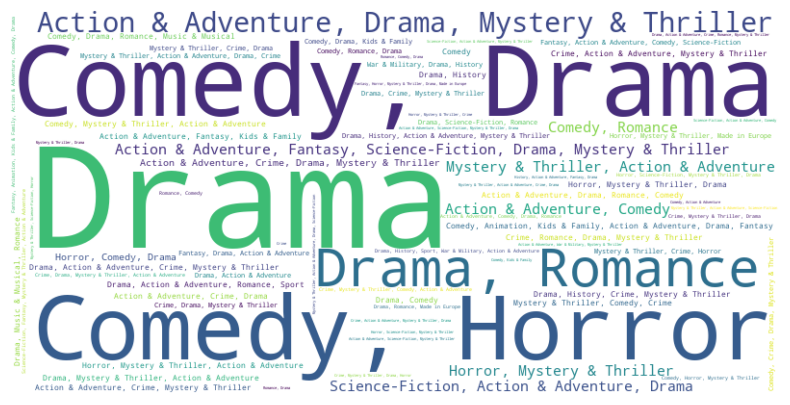

In [51]:
#Let's Visvalize it using word cloud

# for movies 
ge_count = movie_df['Genra'].value_counts()

ge_dict = ge_count.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white')

wordcloud.generate_from_frequencies(ge_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis lines and labels
plt.show()

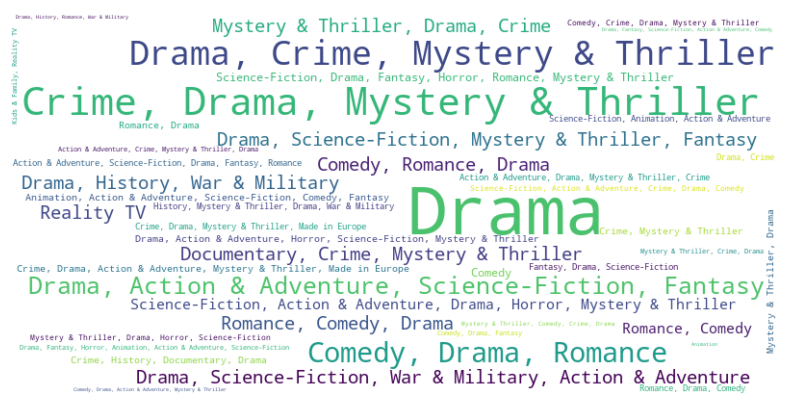

In [52]:
# for tv show 
ge_count1 = tv_df['Genres'].value_counts()

ge_dict1 = ge_count1.to_dict()

wordcloud1 = WordCloud(width=800, height=400, background_color='white')

wordcloud1.generate_from_frequencies(ge_dict1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')  # Turn off axis lines and labels
plt.show()

## **Finding Predominant Streaming Service**

In [53]:
# Write Your Code here


In [54]:
#Let's Visvalize it using word cloud


## **Task 3 :- Data Export**

In [55]:
#saving final dataframe as Final Data in csv format


In [56]:
#saving filter data as Filter Data in csv format
movie_df.to_csv("Final_DF_Movie.csv", index=False)

In [57]:
tv_df.to_csv("Final_DF_TvShow.csv", index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***